<p align="center"><img src="https://raw.githubusercontent.com/ravijagtap/datascience/main/IPL_DATA_ANALYSIS/images/Header.jpg"  /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
  1.1 [**Tournament Format**](#Section11)<br>
  1.2 [**Prize Money**](#Section12)<br>
  1.3 [**Current Teams (2020)**](#Section13)<br>
  1.4 [**Current Points Table**](#Section14)<br>
2. [**Problem Statement**](#Section2)<br>
  2.1 [**Generic Stats**](#Section21)<br>
  2.2 [**Team Stats**](#Section22)<br>
  2.3 [**Player Stats - Batting**](#Section23)<br>
  2.4 [**Player Stats - Bowling**](#Section24)<br>
  2.5 [**Player Stats - Fielding**](#Section25)<br>
  2.6 [**Patnership Stats**](#Section26)<br>
  2.7 [**Duckworth–Lewis Method**](#Section27)<br>  
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Exploratory Data Analysis**](#Section7)<br>
    7.1 [**Generic Stats**](#Section71)<br>
    7.2 [**Mumbai Indians Stats**](#Section72)<br>
    7.3 [**Powerplay**](#Section73)<br>
    7.4 [**Awards**](#Section74)<br>
8. [**Conclusion**](#Section8)<br>


---
<a name = Section1></a>                                                                      
# **1. Introduction**                                                                                              
---

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities or states in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.

There have been twelve seasons of the IPL tournament. The current IPL title holders are the Mumbai Indians, who won the 2019 season. The venue for the 2020 season has been moved, due to the ongoing COVID-19 pandemic; games are now taking place in the United Arab Emirates from 19 September through 10 November 2020.

<a name = Section11></a>
### **1.1 Tournament format**

Currently, with eight teams, each team plays each other twice in a home-and-away round-robin format in the league phase. At the conclusion of the league stage, the top four teams will qualify for the playoffs. The top two teams from the league phase will play against each other in the first Qualifying match, with the winner going straight to the IPL final and the loser getting another chance to qualify for the IPL final by playing the second Qualifying match. Meanwhile, the third and fourth place teams from league phase play against each other in an eliminator match and the winner from that match will play the loser from the first Qualifying match. The winner of the second Qualifying match will move onto the final to play the winner of the first Qualifying match in the IPL Final match, where the winner will be crowned the Indian Premier League champions.

<a name = Section12></a>
### **1.2 Prize money**

The 2019 season of the IPL offered a total prize money of ₹500 million (US\\$7.0 million), with the winning team netting ₹200 million (US\\$2.8 million). The first and second runners up received ₹125 million (US\\$1.8 million) and ₹87.5 million (US\\$1.2 million), respectively, with the fourth placed team also winning ₹87.5 million (US\\$1.2 million). The other teams are not awarded any prize money. The IPL rules mandate that half of the prize money must be distributed among the players.

<a name = Section13></a>
### **1.3 Current Teams (2020)**

- Chennai Super Kings	
- Delhi Capitals	
- Kings XI Punjab	
- Kolkata Knight Riders	
- Mumbai Indians	
- Rajasthan Royals	
- Royal Challengers Bangalore	
- Sunrisers Hyderabad

---
<a name = Section2></a>
# **2. Problem Statement**
---

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues.

To enchance the capabilities of players, to decide on team composition and stratergies, franchises may need concrete and precise analysis over the past plays & performance stats of the player and the team.

Getting the deeper understanding of the data is not possible using the traditional methods.

**Mumbai Indians** franchise owners needs to know all these stats to improve their chances on winning in the upcoming IPL seasons.

So for this analysis **Mumbai Indians** is the team we will be doing analysis for and **Wankhede Stadium** is the home ground.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

<a id = Section31></a>
### **3.1 Installing Libraries**

In [1]:
#!pip install -q datascience                                         
#!pip install -q pandas-profiling                                    

<a id = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
# Upgrading pandas profiling to the latest version
#!pip install -q --upgrade pandas-profiling                          

<a id = Section33></a>
### **3.3 Importing Libraries**

In [237]:
### **Importing Libraries**
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)  

import warnings
warnings.filterwarnings('ignore') 

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

We will use below 2 datasets

1. Matches - https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv

This dataset contains details related to the match such as location, contesting teams, umpires, results, etc


|Id|Column|Description|
|:--|:--|:--|
|01| id	| Match Id| 
|02| season	| Season Year| 
|03| city	| City in which the match as played |  
|04| date	| Date on which match was played| 
|05| team1	| Team Participating in the match|   
|06| team2	| Team Participating in the match|
|07| toss_winner| Team who won the toss|
|08| toss_decision| What team decided after wining the toss|
|09| result| if there was a result, tie or no result|
|10| dl_applied| Duckworth lewis method was applied or not|
|11| winner| Which team won the match|
|12| win_by_runs| Won by Runs |
|13| win_by_wickets| Won By Wickets|
|14| player_of_match| Man of the match|
|15| venue| Name of the stadium|
|16| umpire1| On Field Umpire 1|
|17| umpire2|On Field Umpire 2|
|18| umpire3|Third Umpire|


2. Deliveries - https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/deliveries.csv

This dataset is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc

|Id|Column|Description|
|:--|:--|:--|
|01|match_id|Match Id|
|02|inning|1st or 2nd Inning |
|03|batting_team|Team Batting|
|04|bowling_team|Team Bowling|
|05|over|Over number|
|06|ball|Ball number in the over|
|07|batsman|Name of the Batsman at crease|
|08|non_striker|Name of Batsman at non-striker end|
|09|bowler|Bowler who bowled the over|
|10|is_super_over|Is this a super over|
|11|wide_runs|Runs on wide delivery|
|12|bye_runs|Bye Runs|
|13|legbye_runs|Legbye Runs|
|14|noball_runs|Runs on a noball delivery|
|15|penalty_runs|Penalty Runs|
|16|batsman_runs|Runs by Batsman|
|17|extra_runs|Total Extra Runs|
|18|total_runs|Total Runs (Total Extra + Runs by Batsman)|
|19|player_dismissed|Is Batsman dismissed on this delivery||
|20|dismissal_kind|How Batsman got dismissed|
|20|fielder|If its a caught or bowled then which fielder was involved|



#### Read Data from CSV ####

In [238]:
matches = pd.read_csv("https://raw.githubusercontent.com/ravijagtap/datascience/main/IPL_DATA_ANALYSIS/datasets/matches.csv")
deliveries = pd.read_csv("https://raw.githubusercontent.com/ravijagtap/datascience/main/IPL_DATA_ANALYSIS/datasets/deliveries.csv")

---
<a name = Section5></a>
# **5. Data Profiling**
---

Pandas has an open source module 'pandas_profiling' using which we can quickly do EDA using just few lines of code
It generates an interactive profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious EDA. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

It can be installed using below command if not already installed.

#!pip install pandas_profiling==1.4.1


In [5]:
# import the required module
import pandas_profiling 

In [6]:
# matches dataset profiling
matches_profile = matches.profile_report(title="IPL Data Profiling before Data Processing of matches DF", progress_bar=False, minimal=True)
matches_profile.to_file(output_file="matches_profiling_before_processing.html")

In [7]:
# deliveries dataset profiling
deliveries_profile = deliveries.profile_report(title="IPL Data Profiling before Data processing of deliveries DF", progress_bar=False, minimal=True)
deliveries_profile.to_file(output_file="deliveries_profiling_before_processing.html")

The report can be downloaded from here 
https://github.com/ravijagtap/datascience/blob/main/IPL_DATA_ANALYSIS/matches_profiling_before_processing.html
https://github.com/ravijagtap/datascience/blob/main/IPL_DATA_ANALYSIS/deliveries_profiling_before_processing.html

**Observations from Pandas Profiling of '<em>matches</em>' Data set before Data Processing** <br><br>


###### **<em>matches</em> Data set** ######

__Dataset info__:
- Number of variables: 18
- Number of observations: 696
- Missing cells: 651 (5.2%)
- Duplicate Rows: 0

__Variables types__: 
- Numeric = 4
- Categorical = 13
- Boolean = 1

<br>

- There are overall **11 seasons** data in the data set**.

- **umpire3** has **636 (91.4%) missing values**.

- **city** has **7 (1.0%) missing values**.

- **player_of_match** has high cardinality **214 distinct values**.

- **CH Gayle** has got more **player_of_match (20 times)**.

- out of **696 matches**, we have got results for **686 matches**, **7 were tie matches** and **3 matches has no results**.

- there were overall **19 matches** where  **duckworth lewis** method was applied.

---

###### **<em>deliveries</em> Data set** ######

__Dataset info__:
- Number of variables: 21
- Number of observations: 1,64,750
- Missing cells: 472018 (13.6%)
- Duplicate Rows: 5

__Variables types__: 
- Numeric = 10
- Categorical = 10
- Boolean = 1

<br>

- **player_dismissed** and **dismissal_kind** has **156593 missing values**.

- **batsman** has high cardinality **488 distinct values**.

- **innings** has values as **3** and **4**, which means there were some matches in which super over was bowled.

---
<a name = Section6></a>
# **6. Data Preprocessing**
---

#### Get the dimensions of the datasets ####

**matches**

In [239]:
matches.shape

(696, 18)

- There are 696 rows and 18 columns in the matches dataset

###### View the different datatypes in datasets######

In [240]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               696 non-null    int64 
 1   season           696 non-null    int64 
 2   city             689 non-null    object
 3   date             696 non-null    object
 4   team1            696 non-null    object
 5   team2            696 non-null    object
 6   toss_winner      696 non-null    object
 7   toss_decision    696 non-null    object
 8   result           696 non-null    object
 9   dl_applied       696 non-null    int64 
 10  winner           693 non-null    object
 11  win_by_runs      696 non-null    int64 
 12  win_by_wickets   696 non-null    int64 
 13  player_of_match  693 non-null    object
 14  venue            696 non-null    object
 15  umpire1          695 non-null    object
 16  umpire2          695 non-null    object
 17  umpire3          60 non-null     ob

In [241]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


- Since **date** is not relevant and does not provide any additional insights for our analysis, we will drop this column
- **umpire1, umpire2 and umpire3** can also be dropped for same reason.


In [242]:
matches.drop(['date', 'umpire1', 'umpire2', 'umpire3'], axis=1, inplace=True)

In [243]:
# set id as the index column
matches.set_index('id', inplace=True)

In [244]:
matches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,
1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


**deliveries**

In [245]:
deliveries.shape

(164750, 21)

There are 1,64,750 rows and 21 columns in the deliveries dataset

###### View the different datatypes in datasets######

In [246]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          164750 non-null  int64 
 1   inning            164750 non-null  int64 
 2   batting_team      164750 non-null  object
 3   bowling_team      164750 non-null  object
 4   over              164750 non-null  int64 
 5   ball              164750 non-null  int64 
 6   batsman           164750 non-null  object
 7   non_striker       164750 non-null  object
 8   bowler            164750 non-null  object
 9   is_super_over     164750 non-null  int64 
 10  wide_runs         164750 non-null  int64 
 11  bye_runs          164750 non-null  int64 
 12  legbye_runs       164750 non-null  int64 
 13  noball_runs       164750 non-null  int64 
 14  penalty_runs      164750 non-null  int64 
 15  batsman_runs      164750 non-null  int64 
 16  extra_runs        164750 non-null  int

In [247]:
# set match_id as the index column
deliveries.set_index('match_id', inplace=True)

In [248]:
deliveries["player_dismissed"].count()

8157

In [249]:
a = deliveries["batsman"] + deliveries["bowler"]
a = a.unique()
a

array(['DA WarnerTS Mills', 'S DhawanTS Mills', 'S DhawanA Choudhary',
       ..., 'YK PathanL Ngidi', 'SK RainaCR Brathwaite',
       'AT RayuduCR Brathwaite'], dtype=object)

###### Data Cleaning

In [250]:
#Replacing the Full names by short names
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [251]:
#Replacing the Full names by short names
deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

**Rising Pune Supergiant** is 2 times in the dataset one with name **Rising Pune Supergiant** and other as **Rising Pune Supergiants**, we replaced both with **RPS**

In [252]:
# merge seasons column in deliveries dataset which will be helpful in further analysis for each season
deliveries_seasons = deliveries.merge(matches["season"], left_on=deliveries.index, right_on=matches.index)

---
<a name = Section7></a>
# **7. Exploratory Data Analysis**
---
**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**.

<a name = Section71></a>
### **7.1 Generic Stats**

######  7.1.1 How many seasons we’ve got in the dataset?

In [253]:
matches['season'].nunique()

11

In [254]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018],
      dtype=int64)

- There are 11 seasons from 2008 to 2018

In [255]:
matches['season'].min()

2008

In [256]:
matches['season'].max()

2018

######  How many teams we’ve got in the dataset?

In [257]:
matches['team1'].nunique()

13

######  7.1.2 How many matches we’ve got in the dataset?

In [258]:
len(matches)

696

- Total 696 matches were played in the IPL season from 2008 to 2018

######  7.1.3 How many matches were played in each season

In [259]:
seasons = matches['season'].value_counts().to_frame()
seasons

,season
2013,76
2012,74
2011,73
2018,60
2016,60
2014,60
2010,60
2017,59
2015,59
2008,58


- This shows that most number of matches were played in the year of 2013 (76 matches)

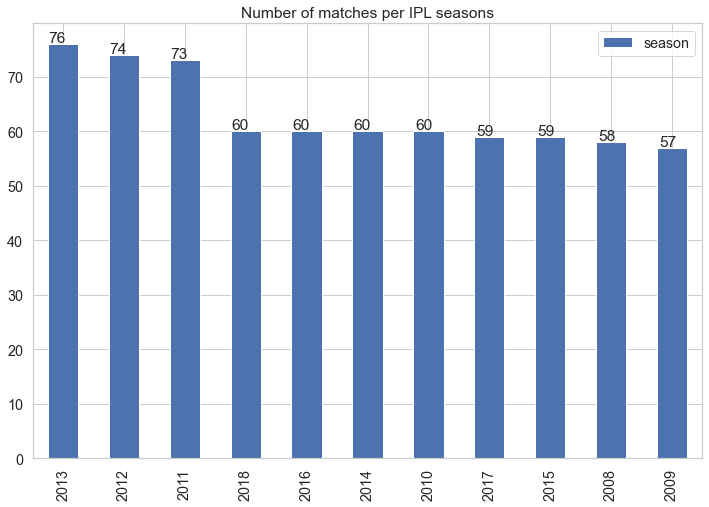

In [260]:
ax = seasons.plot(kind="bar", title="Number of matches per IPL seasons", figsize=(12,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

###### 7.1.4 The Number of matches played in each venue?

In [261]:
no_of_matches = matches['venue'].value_counts().to_frame()
no_of_matches.rename(columns={'venue': 'no_of_matches'}, inplace=True)
no_of_matches

,no_of_matches
M Chinnaswamy Stadium,73
Eden Gardens,70
Feroz Shah Kotla,67
Wankhede Stadium,66
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,40
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Subrata Roy Sahara Stadium,17


- M Chinnaswamy Stadium has hosted most matches (73)
- Wankhede Stadium is the 4th in the list and hosted 66 matches
- There were some matches played outside india as well, like in cities Kingsmead, St George's Park, etc

###### 7.1.5 Overview of matches played, toss won, wins and losses for each team in the IPL history.

In [262]:
overall_team_stats = pd.DataFrame(
    {'Total Matches Played': matches["team1"].value_counts() + matches["team2"].value_counts(), 
     'Toss Won': matches["toss_winner"].value_counts(), 'Total Won': matches["winner"].value_counts(),  
                          'Total Lost': ((matches["team1"].value_counts() + matches["team2"].value_counts()) - matches["winner"].value_counts())})
overall_team_stats.sort_values(by="Total Won", ascending=False)

,Total Matches Played,Toss Won,Total Won,Total Lost
MI,171,90,98,73
CSK,147,77,90,57
KKR,164,87,86,78
RCB,166,77,79,87
KXIP,162,75,76,86
RR,133,69,70,63
DD,161,80,67,94
SRH,93,42,52,41
DC,75,43,29,46
RPS,30,13,15,15


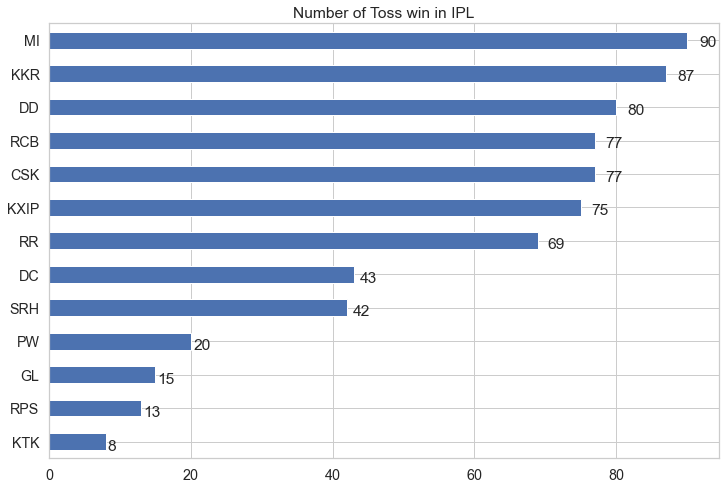

In [263]:
ax = overall_team_stats["Toss Won"].sort_values().plot(kind="barh", title="Number of Toss win in IPL", figsize=(12,8))
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.020, p.get_y() * 1.005))

- Mumbai Indians has won most of the matches till now (98 times)

###### 7.1.6 Winner of each season

In [264]:
season_winner = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']]
season_winner.sort_values(by="season").reset_index(drop=True)

,season,winner
0,2008,RR
1,2009,DC
2,2010,CSK
3,2011,CSK
4,2012,KKR
5,2013,MI
6,2014,KKR
7,2015,MI
8,2016,SRH
9,2017,MI


###### 7.1.7 Overall Win ratio of each team

In [265]:
overall_team_stats['Win Ratio'] = overall_team_stats['Total Won'] * 100 / overall_team_stats['Total Matches Played']
overall_team_stats['Loss Ratio'] = overall_team_stats['Total Lost'] * 100 / overall_team_stats['Total Matches Played']
overall_team_stats.round(2).sort_values(by="Win Ratio", ascending = False)

,Total Matches Played,Toss Won,Total Won,Total Lost,Win Ratio,Loss Ratio
CSK,147,77,90,57,61.22,38.78
MI,171,90,98,73,57.31,42.69
SRH,93,42,52,41,55.91,44.09
RR,133,69,70,63,52.63,47.37
KKR,164,87,86,78,52.44,47.56
RPS,30,13,15,15,50.00,50.00
RCB,166,77,79,87,47.59,52.41
KXIP,162,75,76,86,46.91,53.09
GL,30,15,13,17,43.33,56.67
KTK,14,8,6,8,42.86,57.14


######  7.1.8 Has Toss-winning helped in winning matches?

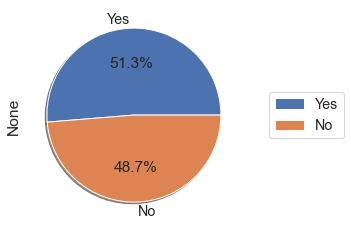

In [266]:
wins = matches["toss_winner"] == matches["winner"]
ax = wins.value_counts().plot(kind="pie", autopct='%1.1f%%', shadow=True, labels=(["Yes", "No"]))
ax.legend(["Yes", "No"], loc="right", bbox_to_anchor=(1, 0, 0.5, 1))

- This piechart shows that winning toss actualy helped winning the match as well by 51.3%

###### 7.1.9 Check for each team what is the winning percentage when the team won the toss

In [267]:
# toss and match wins by toss_winner
toss_winner_as_winner = matches[matches['winner'] == matches['toss_winner']].groupby(['toss_winner'])['winner'].count()

# total toss wins by toss_winner
total_toss_winner = matches.groupby(['toss_winner'])['winner'].count()

win_per_on_toss_win = toss_winner_as_winner / total_toss_winner * 100
win_per_on_toss_win = win_per_on_toss_win.to_frame()
win_per_on_toss_win['lost_per_on_toss_win'] = 100 - win_per_on_toss_win['winner']
win_per_on_toss_win.rename(columns={'winner': 'Win % on toss win', 'lost_per_on_toss_win': 'Loss % on toss win'}, inplace=True)
win_per_on_toss_win.rename_axis("Toss Winner", inplace=True)
win_per_on_toss_win.round(2).sort_values(by="Win % on toss win", ascending=False)


,Win % on toss win,Loss % on toss win
Toss Winner,,
GL,66.67,33.33
CSK,64.94,35.06
RPS,61.54,38.46
KKR,56.32,43.68
MI,55.56,44.44
RR,54.41,45.59
RCB,51.32,48.68
KTK,50.00,50.00
SRH,50.00,50.00


- Mumbai Indians won only 55.56% of the matches in which they won the toss

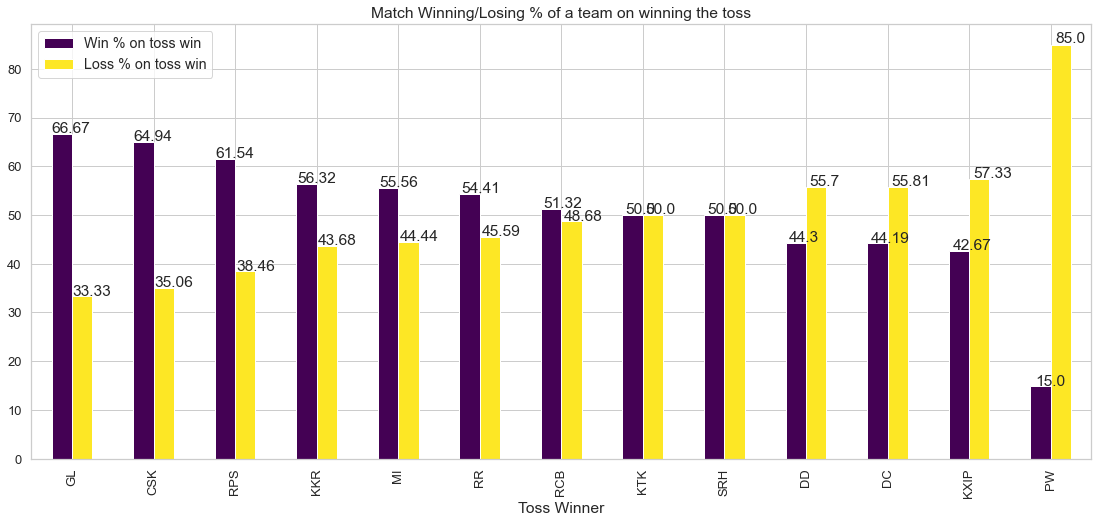

In [268]:
ax = win_per_on_toss_win.round(2).sort_values(by='Win % on toss win', ascending=False).plot.bar(figsize=(19,8), title="Match Winning/Losing % of a team on winning the toss",fontsize=13,
                                                            cmap='viridis')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

###### 7.1.10 Which stadium is best for winning by runs (most number of wins)?

In [269]:
stats.mode(matches["venue"][matches["win_by_runs"]!=0])

ModeResult(mode=array(['Feroz Shah Kotla'], dtype=object), count=array([33]))

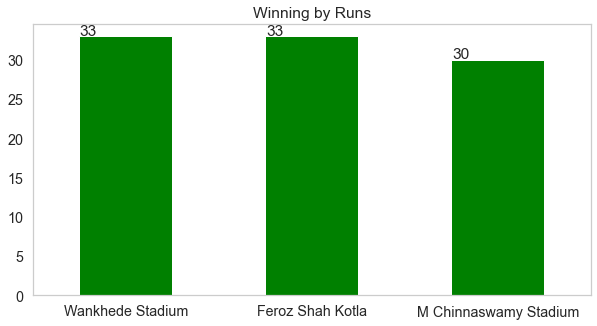

In [270]:
ax = matches["venue"][matches["win_by_runs"]!=0].value_counts().head(3).plot(kind="bar", grid=False, rot=0, color='green', figsize=(10, 5), title="Winning by Runs")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

- **Feroz Shah Kotla** is the best stadium for winning by runs

###### 7.1.11 Which stadium is best for winning by wickets  (most number of wins)?

In [271]:
stats.mode(matches["venue"][matches["win_by_wickets"]!=0])

ModeResult(mode=array(['Eden Gardens'], dtype=object), count=array([41]))

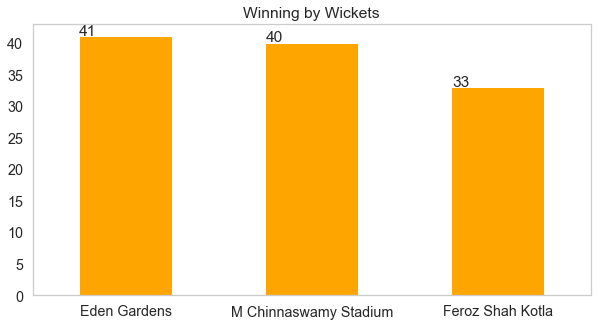

In [272]:
ax = matches["venue"][matches["win_by_wickets"]!=0].value_counts().head(3).plot(kind="bar", rot=0, grid=False, color='orange', figsize=(10, 5), title="Winning by Wickets")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

- **Eden Gardens** is the best stadium for winning by wickets

######  7.1.12 Which are the top 5 stadiums for winning by runs against number of matches played (atleast 10 matches should have been played on the venue)?

In [273]:
atleast_10_mtch_at_venue = matches['venue'].value_counts().to_frame()
# Venues where atleast 10 matches are played
atleast_10_mtch_at_venue = atleast_10_mtch_at_venue[atleast_10_mtch_at_venue['venue'] >= 10]['venue'].to_frame()
atleast_10_mtch_at_venue.rename(columns={'venue': 'no_of_matches'}, inplace=True)
atleast_10_mtch_at_venue

,no_of_matches
M Chinnaswamy Stadium,73
Eden Gardens,70
Feroz Shah Kotla,67
Wankhede Stadium,66
"Rajiv Gandhi International Stadium, Uppal",56
"MA Chidambaram Stadium, Chepauk",49
Sawai Mansingh Stadium,40
"Punjab Cricket Association Stadium, Mohali",35
Maharashtra Cricket Association Stadium,21
Subrata Roy Sahara Stadium,17


In [274]:
# Filter the matches dataset to select on matches which were played in stadiums where atleast 10 matches were played
matches1 = matches[matches['venue'].isin(atleast_10_mtch_at_venue.index)]

In [275]:
matches1[matches1['win_by_runs'] > 0]['venue'].value_counts()

Wankhede Stadium                                        33
Feroz Shah Kotla                                        33
M Chinnaswamy Stadium                                   30
MA Chidambaram Stadium, Chepauk                         30
Eden Gardens                                            29
Rajiv Gandhi International Stadium, Uppal               23
Punjab Cricket Association Stadium, Mohali              15
Sawai Mansingh Stadium                                  14
Subrata Roy Sahara Stadium                              11
Kingsmead                                                9
Dr DY Patil Sports Academy                               7
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium      7
Punjab Cricket Association IS Bindra Stadium, Mohali     7
Maharashtra Cricket Association Stadium                  7
Sardar Patel Stadium, Motera                             6
Brabourne Stadium                                        6
SuperSport Park                                         

In [276]:
win_by_runs = matches1[matches1['win_by_runs'] > 0]['venue'].value_counts() * 100 / matches1['venue'].value_counts() 
win_by_runs = win_by_runs.sort_values(ascending=False).head(5).to_frame()
win_by_runs.rename(columns={'venue': 'winning_percentage'}, inplace=True)
win_by_runs

,winning_percentage
Subrata Roy Sahara Stadium,64.705882
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,63.636364
"MA Chidambaram Stadium, Chepauk",61.224490
Kingsmead,60.000000
Brabourne Stadium,54.545455


######  7.1.13 Which are the top 5 stadiums for winning by wickets against number of matches played (atleast 10 matches should have been played on the venue)?

In [277]:
# Filter the matches dataset to select on matches which were played in stadiums where atleast 10 matches were played
matches2 = matches[matches['venue'].isin(atleast_10_mtch_at_venue.index)]

In [278]:
win_by_wickets = matches1[matches1['win_by_wickets'] > 0]['venue'].value_counts() * 100 / matches1['venue'].value_counts() 
win_by_wickets = win_by_wickets.sort_values(ascending=False).head(5).to_frame()
win_by_wickets.rename(columns={'venue': 'winning_percentage'}, inplace=True)
win_by_wickets

,winning_percentage
Maharashtra Cricket Association Stadium,66.666667
SuperSport Park,66.666667
Sawai Mansingh Stadium,65.000000
Saurashtra Cricket Association Stadium,60.000000
Dr DY Patil Sports Academy,58.823529


###### 7.1.14 Which is the best-chasing team?

In [279]:
matches["winner"][matches["win_by_wickets"]!=0].mode()

0    KKR
dtype: object

- **Kolkata Knight Riders** is the best team in chasing

###### 7.1.15 Does choosing batting or bowling first helped in match winning?

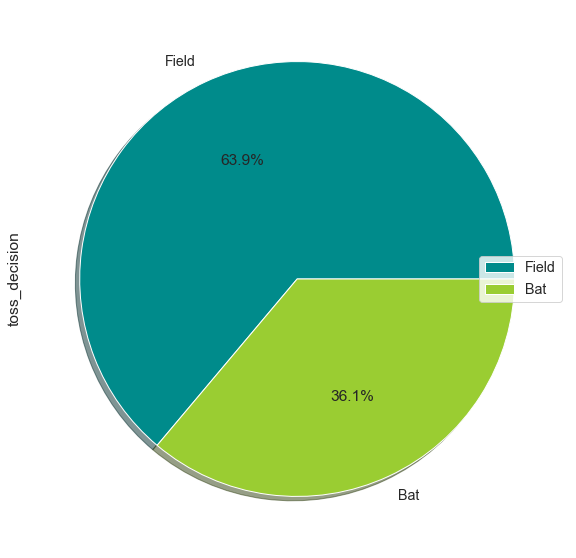

In [436]:
wins = matches["toss_decision"][matches["toss_winner"]==matches["winner"]]
ax = wins.value_counts().plot(kind="pie", autopct='%1.1f%%', shadow=True, labels=(["Field", "Bat"]), figsize=(10, 10), colors=['darkcyan', 'yellowgreen'])
ax.legend(["Field", "Bat"], loc="right")

- From above chart we can say that by choosing fielding first by toss winner helped in winning the match as well 

<a name = Section72></a>
### **7.2 Mumbai Indians Stats**

###### 7.2.1 Number of matches won by Mumbai Indians per season?

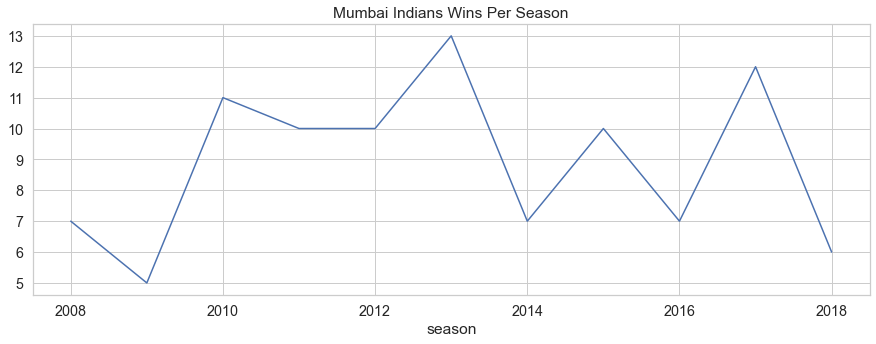

In [281]:
no_of_wins = matches[matches['winner'] == 'MI'].groupby(['season']).count()
no_of_wins["winner"].plot(kind="line", figsize=(15, 5), title="Mumbai Indians Wins Per Season")

###### 7.2.2 For **MI** which  stadium is best when they win the toss?

In [282]:
matches["venue"][matches["toss_winner"]=="MI"][matches["winner"]=="MI"].mode()

0    Wankhede Stadium
dtype: object

- **Wankhede Stadium** is the best when **MI** win the toss

######  7.2.3 Does batting first or bowling first helped in match winning for Mumbai Indians at each venue?

In [283]:
# filter matches which MI played
mi_matches = matches[(matches['team1'] == "MI") | (matches['team2'] == "MI")]
mi_total_matches = mi_matches["venue"].value_counts().to_frame()
mi_total_matches.rename(columns={'venue': 'NO_OF_MATCHES_AT_VENUE'}, inplace=True)

#filter where MI is winner and win is by Run 
win_by_runs = mi_matches[(mi_matches['winner'] == "MI") & (mi_matches["win_by_runs"] > 0)]
win_by_runs_count = win_by_runs['venue'].value_counts().to_frame()
win_by_runs_count.rename(columns={'venue': 'MI_WINS_BY_RUNS'}, inplace=True)

#filter where MI is winner and win is by wickets
win_by_wickets = mi_matches[(mi_matches['winner'] == "MI") & (mi_matches["win_by_wickets"] > 0)]
win_by_wickets_count = win_by_wickets['venue'].value_counts().to_frame()
win_by_wickets_count.rename(columns={'venue': 'MI_WINS_BY_WICKETS'}, inplace=True)

# merge the datasets
frames = [mi_total_matches, win_by_runs_count, win_by_wickets_count]
result = pd.concat(frames, axis=1)

#get the percentage of totals wins over total matches played
result["MI_NO_OF_LOSS"] =  result["NO_OF_MATCHES_AT_VENUE"]  - result["MI_WINS_BY_RUNS"] - result["MI_WINS_BY_WICKETS"];
result["WIN_BY_RUN_PERCENTAGE"] = result["MI_WINS_BY_RUNS"] * 100 / result["NO_OF_MATCHES_AT_VENUE"] 
result["WIN_BY_WICKET_PERCENTAGE"] = result["MI_WINS_BY_WICKETS"] * 100 / result["NO_OF_MATCHES_AT_VENUE"] 
result

,NO_OF_MATCHES_AT_VENUE,MI_WINS_BY_RUNS,MI_WINS_BY_WICKETS,MI_NO_OF_LOSS,WIN_BY_RUN_PERCENTAGE,WIN_BY_WICKET_PERCENTAGE
Wankhede Stadium,60,21.0,16.0,23.0,35.000000,26.666667
Eden Gardens,12,5.0,5.0,2.0,41.666667,41.666667
M Chinnaswamy Stadium,11,2.0,6.0,3.0,18.181818,54.545455
Feroz Shah Kotla,10,2.0,1.0,7.0,20.000000,10.000000
"Rajiv Gandhi International Stadium, Uppal",9,3.0,2.0,4.0,33.333333,22.222222
Brabourne Stadium,8,3.0,3.0,2.0,37.500000,37.500000
Dr DY Patil Sports Academy,7,4.0,1.0,2.0,57.142857,14.285714
"MA Chidambaram Stadium, Chepauk",6,1.0,2.0,3.0,16.666667,33.333333
"Punjab Cricket Association Stadium, Mohali",6,1.0,2.0,3.0,16.666667,33.333333
Sawai Mansingh Stadium,6,1.0,1.0,4.0,16.666667,16.666667


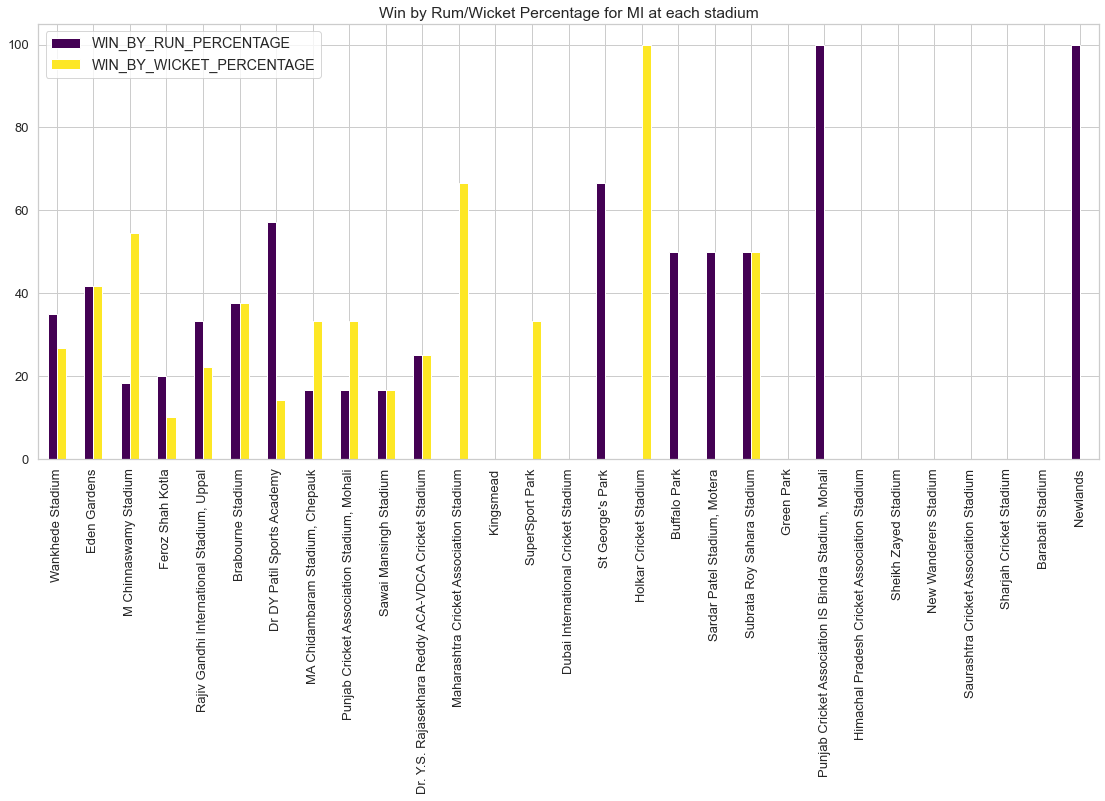

In [284]:
result[["WIN_BY_RUN_PERCENTAGE", "WIN_BY_WICKET_PERCENTAGE"]].plot.bar(figsize=(19,8), title="Win by Rum/Wicket Percentage for MI at each stadium",fontsize=13,
                                                            cmap='viridis')

###### 7.2.4 Hows the performance of MI at home ground (Wankhade)

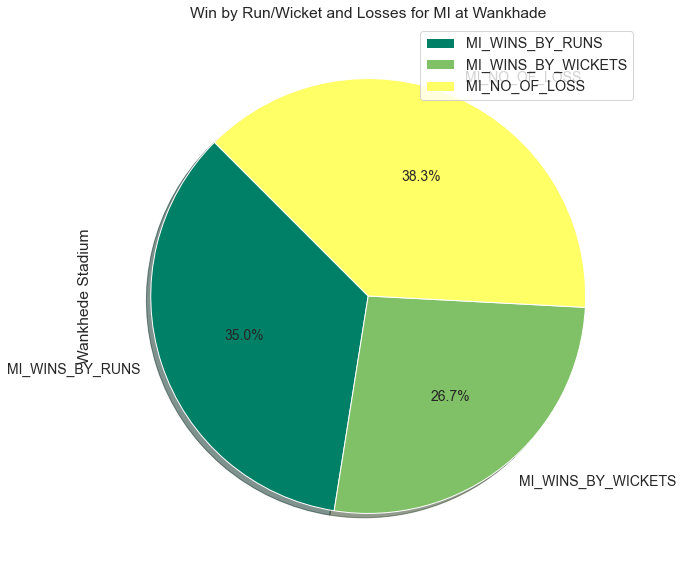

In [285]:
result.iloc[0, 1:4].plot(kind='pie', fontsize=14, autopct='%3.1f%%', title="Win by Run/Wicket and Losses for MI at Wankhade", 
         figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')


- **Mumbai Indians** played most matches at **Wankhede Stadium** where batting first helped them winning the match by 35%

###### 7.2.5 MI Performance - Winning by Runs

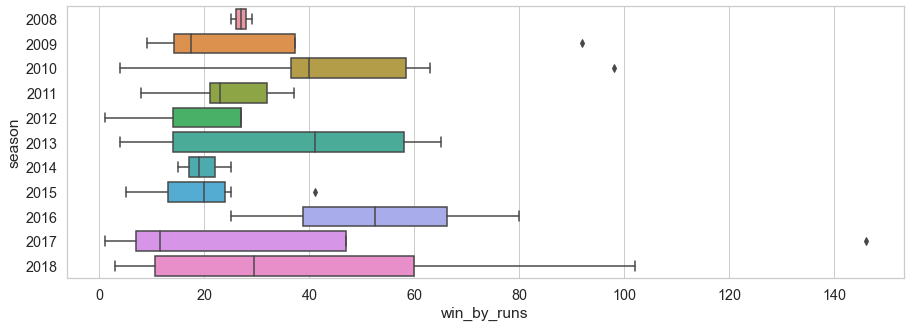

In [286]:
#Winning by Runs - Team Performance
plt.figure(figsize=(15,5))
sns.boxplot(y = 'season', x = 'win_by_runs', data=matches[(matches['win_by_runs'] > 0) & (matches["team1"] == "MI")], orient = 'h');
plt.show()

###### 7.2.6 MI Performance - Winning by Wickets

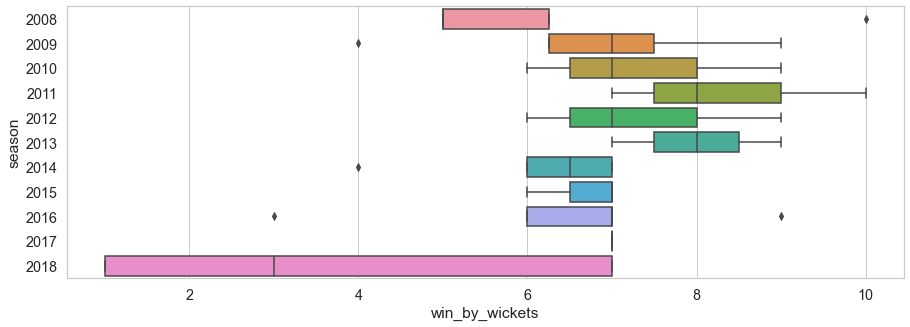

In [287]:
# Winning by Wickets - Team Performance
plt.figure(figsize=(15,5))
sns.boxplot(y = 'season', x = 'win_by_wickets', data=matches[(matches['win_by_wickets'] > 0) & (matches["team1"] == "MI")], orient = 'h');
plt.show()

######  7.2.7 Against which team Mumbai Indians got the most defeats

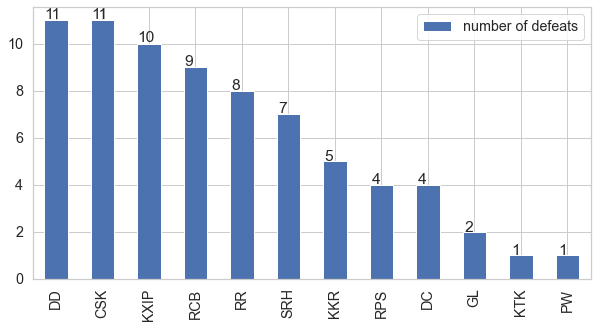

In [288]:
mi_defeats = mi_matches[mi_matches['winner'] != "MI"]['winner'].value_counts().to_frame()
mi_defeats.rename(columns={'winner': 'number of defeats'}, inplace=True)
ax = mi_defeats.plot(kind="bar", figsize=(10, 5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

- **CSK** and **DD** defeated MI 11 times

###### Check if CSK and DD opted to field or bat first in these matches in which MI got defeat

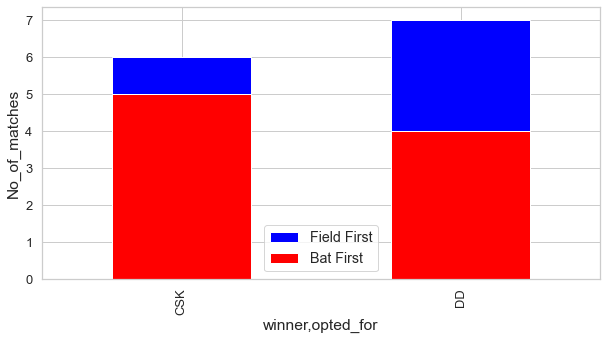

In [289]:
csk_dd = ["CSK", "DD"]
mi_csk_dd_matches = mi_matches[(mi_matches['winner'] != "MI") & (mi_matches['team1'].isin(csk_dd) | mi_matches['team2'].isin(csk_dd))]

mi_csk_dd_matches['opted_for']=mi_csk_dd_matches["win_by_runs"].apply(lambda x : "BAT" if(x > 0) else "FIELD")

plt.figure(figsize=(10,5))
mi_csk_dd_matches[mi_csk_dd_matches["opted_for"] == "FIELD"].groupby(["winner"])["opted_for"].value_counts().plot(kind='bar', color='blue')
mi_csk_dd_matches[mi_csk_dd_matches["opted_for"] == "BAT"].groupby(["winner"])["opted_for"].value_counts().plot(kind='bar', color='red', fontsize=13)

plt.ylabel("No_of_matches")
plt.xticks([0, 1], ["CSK", "DD"])
plt.legend(['Field First', 'Bat First'])
plt.show()


- Most of the times both CSK and DD opted to field first against MI in which MI lost the matches

###### 7.2.8 For MI which bowler gave the most extra runs (top 5 only) (take only bowlers who bowled atleast 24 deliveries). Find the % of extra over total balls bowled

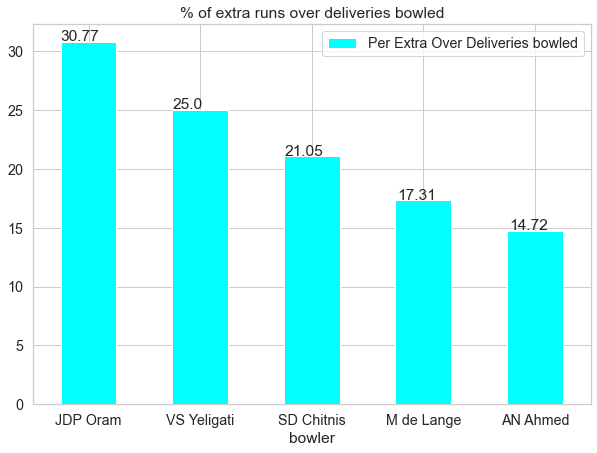

In [290]:
no_of_deliveries_per_bowler = deliveries[deliveries["bowling_team"] == "MI"].groupby("bowler")["bowler"].count().to_frame()
no_of_deliveries_per_bowler.rename(columns={'bowler': 'no_of_deliveries'}, inplace=True)
no_of_deliveries_per_bowler_atleast24 = no_of_deliveries_per_bowler[no_of_deliveries_per_bowler["no_of_deliveries"] > 24]

total_extra_runs = deliveries[deliveries["bowling_team"] == "MI"].groupby("bowler")["extra_runs"].sum().to_frame()
total_extra_runs.rename(columns={'extra_runs': 'no_of_deliveries'}, inplace=True)

perc = total_extra_runs * 100 / no_of_deliveries_per_bowler_atleast24
perc.rename(columns={'no_of_deliveries': 'Per Extra Over Deliveries bowled'}, inplace=True)
ax = perc.sort_values(by="Per Extra Over Deliveries bowled", ascending=False).head(5).round(2).plot(kind="bar", rot=0, legend="asd", color="aqua", figsize=(10, 7), title="% of extra runs over deliveries bowled")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

- **JDP Oram** gave the most runs in extra

<a name = Section73></a>
### 7.3 Powerplay

Powerplay is of 6 overs for both innings of the match. During powerplay there is a field restriction. During this overs teams try to score maximum runs or try to take more wickets

###### 7.3.1 Compare total runs scored by each team throught IPL in power play

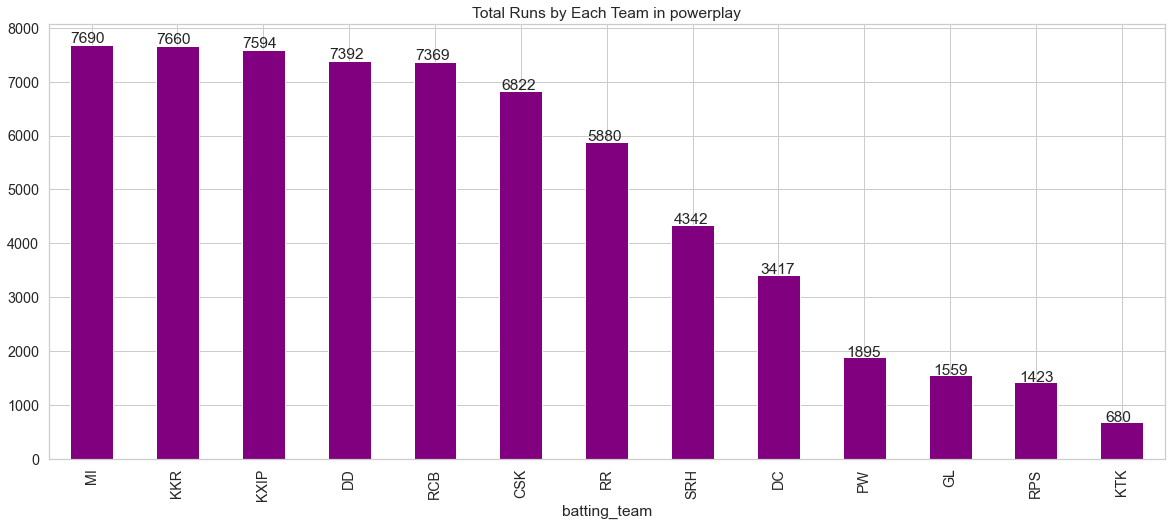

In [291]:
runs_per_team = deliveries_seasons[(deliveries_seasons["over"] <= 6)].groupby(deliveries_seasons["batting_team"])["total_runs"].sum()
ax = runs_per_team.sort_values(ascending = False).plot(kind="bar", figsize=(20,8), title="Total Runs by Each Team in powerplay", color="purple")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


- **MI** scored the highest number of runs (7690) throughtout the IPL season in power plays



###### 7.3.2 Compare total wickets taken by each team throught IPL in power play

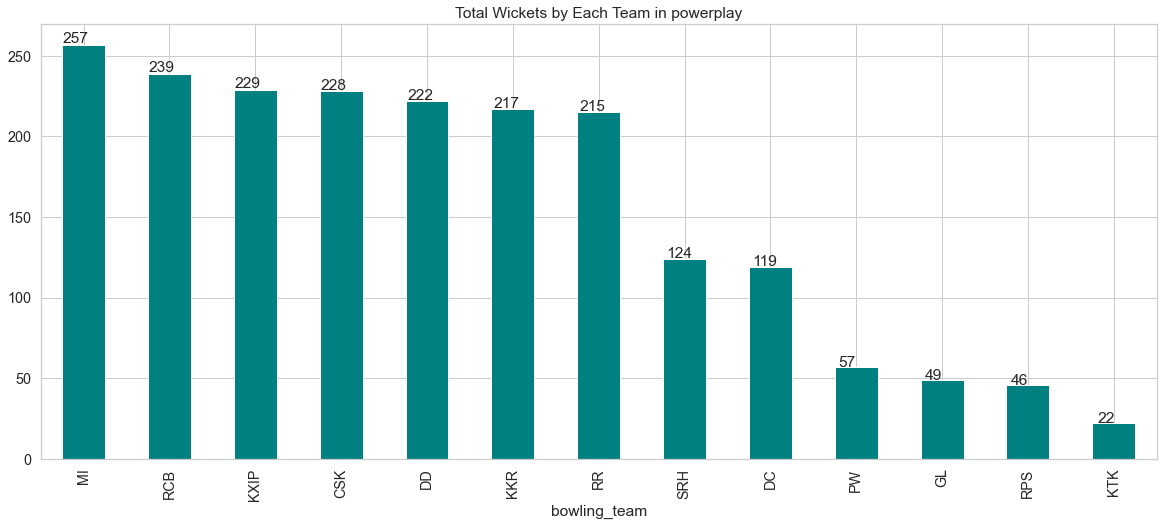

In [292]:
wick_in_powerplay_per_match_per_season = deliveries_seasons[(deliveries_seasons["over"] <= 6) & (deliveries_seasons["player_dismissed"].notnull())].groupby(deliveries_seasons["bowling_team"])["player_dismissed"].count()
ax = wick_in_powerplay_per_match_per_season.sort_values(ascending = False).plot(kind="bar", figsize=(20,8), color="teal", title="Total Wickets by Each Team in powerplay")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

- **MI** took the highest number of wickets (257) in powerplays

###### 7.3.3 Which team scored highest runs in powerplay against **MI**

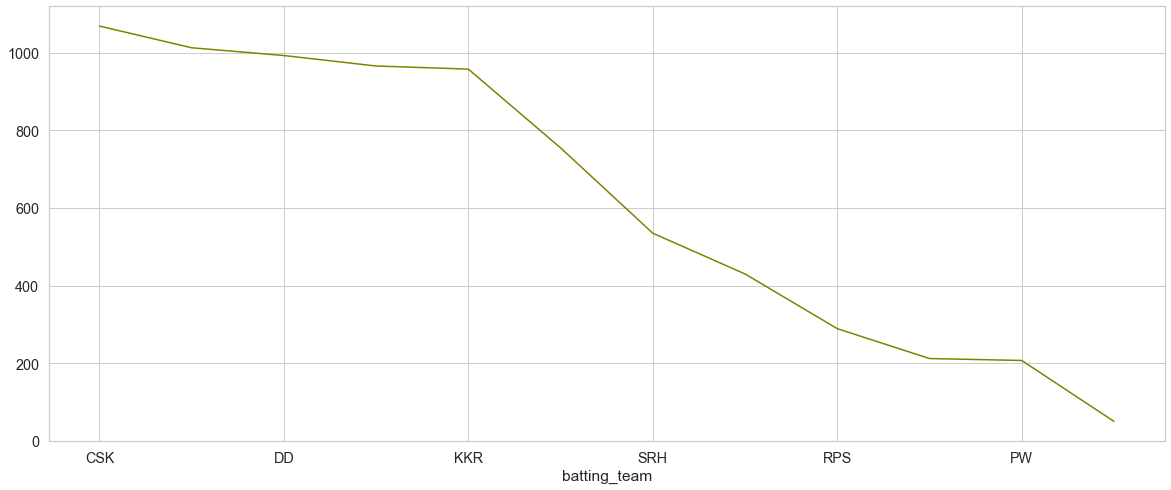

In [293]:
runs_per_team = deliveries_seasons[(deliveries_seasons["over"] <= 6) & (deliveries_seasons["bowling_team"] == "MI")].groupby(deliveries_seasons["batting_team"])["total_runs"].sum()
ax = runs_per_team.sort_values(ascending = False).plot(kind="line", color="olive", figsize=(20,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


- **CSK** scored maximum runs in powerplay (1069) followed by **KXIP** (1013) in powerplay

###### 7.3.4 Which team took most **MI** wickets in powerplay

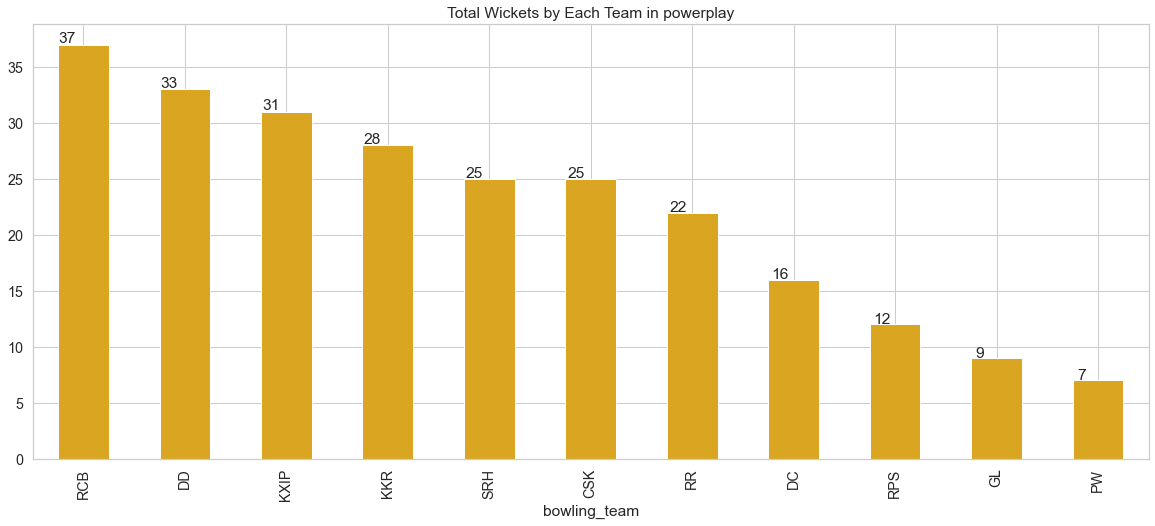

In [294]:
wick_in_powerplay_per_match_per_season = deliveries_seasons[(deliveries_seasons["batting_team"] == "MI") & (deliveries_seasons["over"] <= 6) & (deliveries_seasons["player_dismissed"].notnull())].groupby(deliveries_seasons["bowling_team"])["player_dismissed"].count()
ax = wick_in_powerplay_per_match_per_season.sort_values(ascending = False).plot(kind="bar", figsize=(20,8), color="goldenrod", title="Total Wickets by Each Team in powerplay")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

- **RCB** took most **MI** wickets (37) followed by **DD** (33) in powerplay

#### Further Breakdown of the runs and wickets in powerplay per season
###### 7.3.5 Check average runs scored in powerplay by each team per season

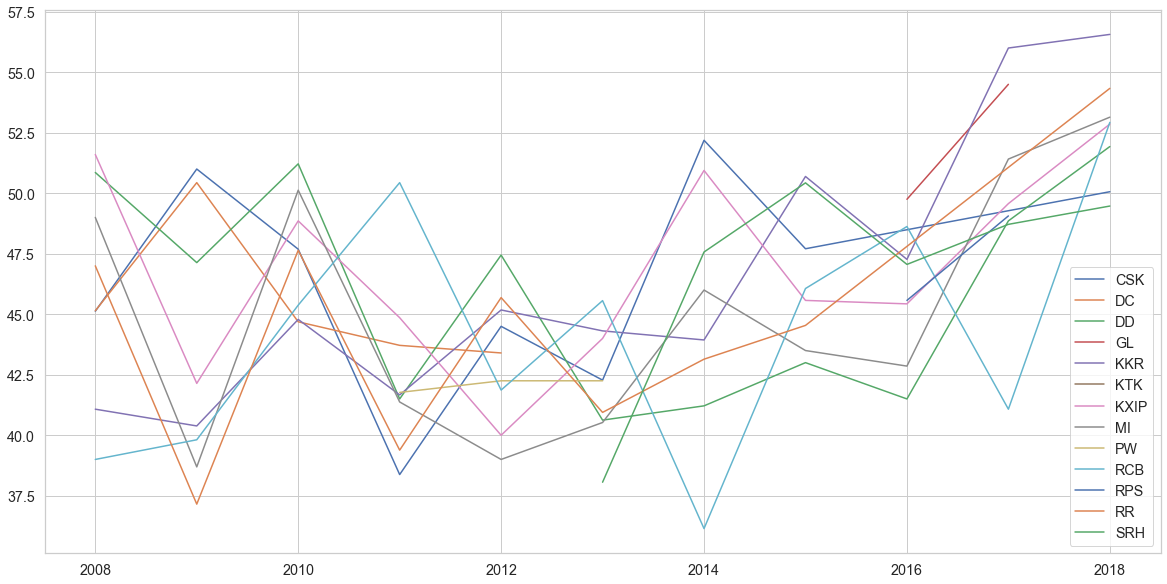

In [295]:
teams = np.sort(matches["team1"].unique())

plt.figure(figsize=(20,10))

for key, team in enumerate(teams):    
    run_in_powerplay_per_match_per_season = deliveries_seasons[(deliveries_seasons["batting_team"] == team) & (deliveries_seasons["over"] <= 6)].groupby(["key_0", "season"])["total_runs"].sum().to_frame()    
    
    a = run_in_powerplay_per_match_per_season.groupby(["season"])["total_runs"].mean()   
    
    plt.plot(list(a.index), a, label = team)
    
plt.legend()
plt.show()


###### 7.3.6 Check average wickets taken by a team in powerplay by per season

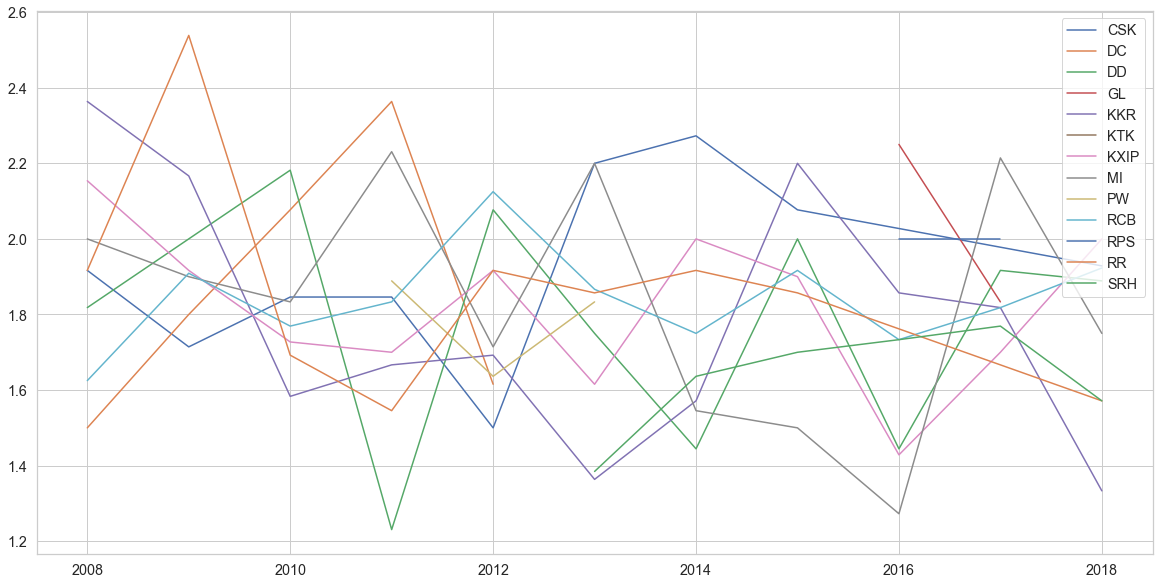

In [296]:
teams = np.sort(matches["team1"].unique())

plt.figure(figsize=(20,10))

for key, team in enumerate(teams):    
    wick_in_powerplay_per_match_per_season = deliveries_seasons[(deliveries_seasons["bowling_team"] == team) & (deliveries_seasons["over"] <= 6) & (deliveries_seasons["player_dismissed"].notnull())].groupby(["key_0", "season"])["season"].count()    
    a = wick_in_powerplay_per_match_per_season.groupby(["season"]).mean()    
    plt.plot(list(a.index), a, label = team)
    
plt.legend()
plt.show()



###### 7.3.7 For MI which player has maximum strike rate in powerplays

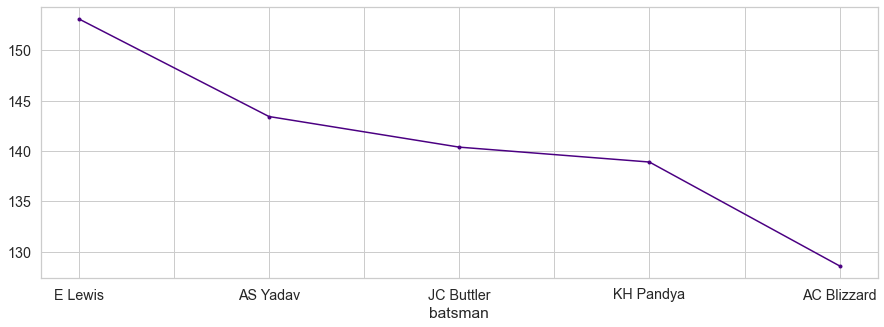

In [333]:
mi_batsman = deliveries_seasons[(deliveries_seasons["batting_team"] == "MI") & (deliveries_seasons["over"] <= 6)]

batsman_mean = (mi_batsman.groupby("batsman")["batsman_runs"].mean() * 100).round(2)

ax = batsman_mean.sort_values(ascending = False).head(5).plot(style='.-', kind="line", figsize=(15,5), color="indigo")

for p in ax.patches:
    print(p.get_height())
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


- **E Lewis** has the maximum strike rate of 166

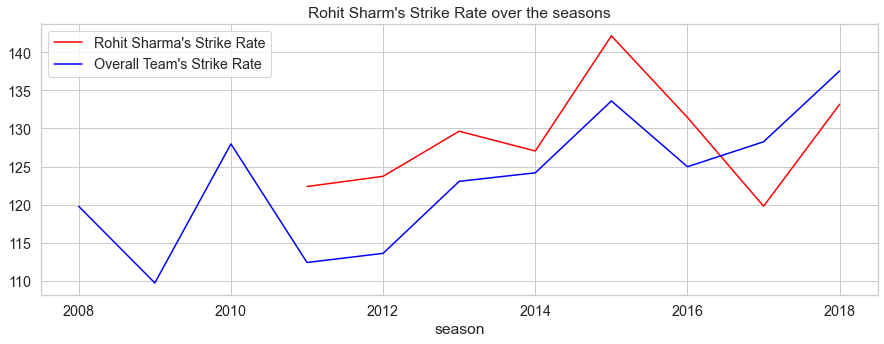

In [352]:
rg_sharma = deliveries_seasons[(deliveries_seasons["batting_team"] == "MI") & (deliveries_seasons["batsman"] == "RG Sharma")]

rg_sharma_mean = (rg_sharma.groupby("season")["batsman_runs"].mean() * 100).round(2)

ax = rg_sharma_mean.plot(kind="line", figsize=(15,5), title="Rohit Sharm's Strike Rate over the seasons", color="red")

mi_batsman = deliveries_seasons[(deliveries_seasons["batting_team"] == "MI")]

mi_batsman_mean = (mi_batsman.groupby("season")["batsman_runs"].mean() * 100).round(2)

ax = mi_batsman_mean.plot(kind="line", figsize=(15,5), title="Rohit Sharm's Strike Rate over the seasons", color="blue")
ax.legend(["Rohit Sharma's Strike Rate", "Overall Team's Strike Rate"])

###### 7.3.8 For MI which bowler is most economical in powerplays, the bowler must have bowled atleast 20 overs overall

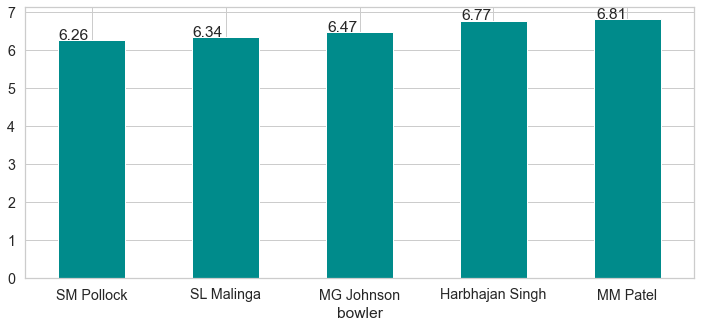

In [359]:
mi_bowlers = deliveries_seasons[(deliveries_seasons["bowling_team"] == "MI") & (deliveries_seasons["over"] <= 6)]

total_runs = mi_bowlers.groupby("bowler")["total_runs"].sum().to_frame()

overs_per_match = mi_bowlers[mi_bowlers["ball"] <= 6].groupby(["key_0", "bowler"])["over"].nunique().to_frame()
total_overs = overs_per_match.groupby("bowler").sum()

# bowler bowled atleat 20 overs
total_overs = total_overs[total_overs["over"] >= 20]

economic_rate = total_runs["total_runs"] / total_overs["over"]
economic_rate.sort_values(ascending = True).head(5)
ax = economic_rate.sort_values(ascending = True).round(2).head(5).plot(kind="bar", color="darkcyan", rot=0, figsize=(12,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


- **SM Pollock** is the most economical baller for **MI**

##### 7.3.9 Which bowler has taken most wickets against MI

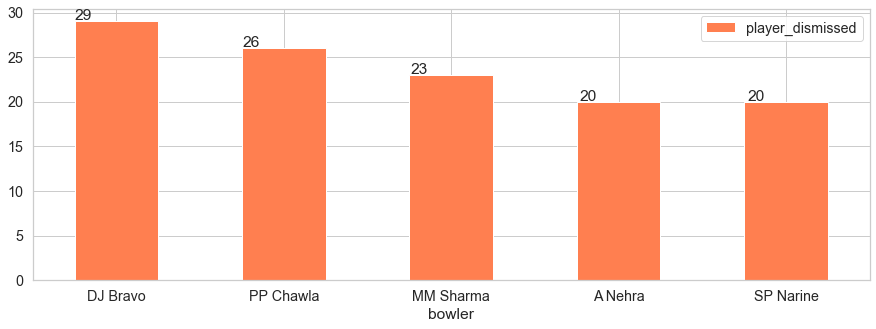

In [375]:
mi_wickets = deliveries_seasons[(deliveries_seasons["batting_team"] == "MI") & (deliveries_seasons["player_dismissed"].notnull())].groupby(deliveries_seasons["bowler"])["player_dismissed"].count()
mi_wickets_df = mi_wickets.sort_values(ascending = False).head(5).to_frame()
ax = mi_wickets_df.plot(kind="bar", color="coral",  rot=0, figsize=(15,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


- **DJ Bravo** has taken most wickets (29) against **MI**

###### 7.3.10 For MI which players patnership is successfull

In [301]:
deliveries[deliveries["batting_team"] == "MI"].groupby(["batsman", "non_striker"])["total_runs"].sum().sort_values(ascending = False).to_frame()

total_runs
batsman    non_striker            
RG Sharma  KA Pollard          666
KA Pollard RG Sharma           632
RG Sharma  AT Rayudu           585
AT Rayudu  RG Sharma           580
KA Pollard AT Rayudu           547
...                            ...
RV Uthappa L Ronchi              0
           MK Pandey             0
           SS Tiwary             0
JC Buttler HH Pandya             0
PJ Sangwan M Markande            0

[697 rows x 1 columns]

- **RG Sharma** and **KA Pollards** patnership is the most successful (666 + 632 = 1298 Runs) for **MI** followed by **RG Sharma** and **AT Rayudu** (585 + 580 = 1165 Runs)

###### 7.3.11 Which top 5 batsmans are most successful in super overs

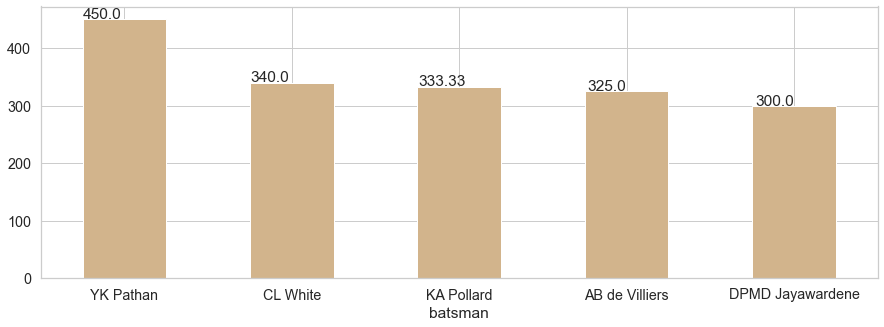

In [392]:
super_overs_mean = (deliveries[deliveries["is_super_over"] == 1]).groupby("batsman")["batsman_runs"].mean()
super_overs_mean_perc = (super_overs_mean * 100).sort_values(ascending = False).head()
ax = super_overs_mean_perc.round(2).plot(kind="bar", rot=0, figsize=(15, 5), color="tan")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

###### 7.3.12 Which top 5 bowlers are most successful in super overs in terms of wickets

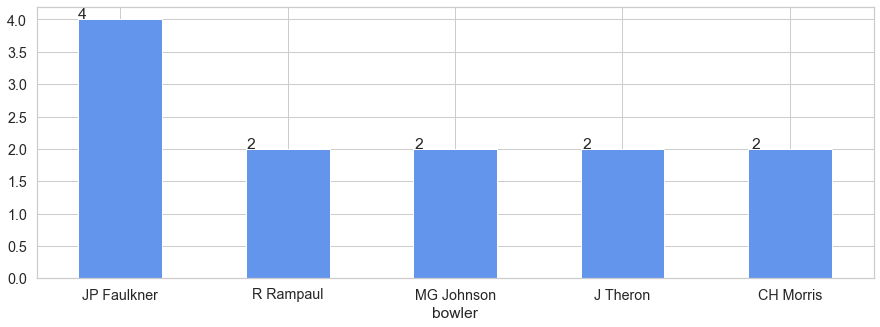

In [403]:
super_overs = deliveries[(deliveries["is_super_over"] == 1) & (deliveries["player_dismissed"].notnull())].groupby("bowler")["player_dismissed"].count().sort_values(ascending = False).head()
ax = super_overs.plot(kind="bar", figsize=(15, 5), color='cornflowerblue', rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

<a name = Section74></a>
### 7.4 Awards

In IPL there are different awards that are being given to players. They are Orange Cap, Purple Cap, Maximum Sixes Award, Most Valuable Player and Emerging Player of the Year. Will find out which players got Orange Cap and Purple Cap awards per season

###### 7.4.1 Top player of the match Winners######

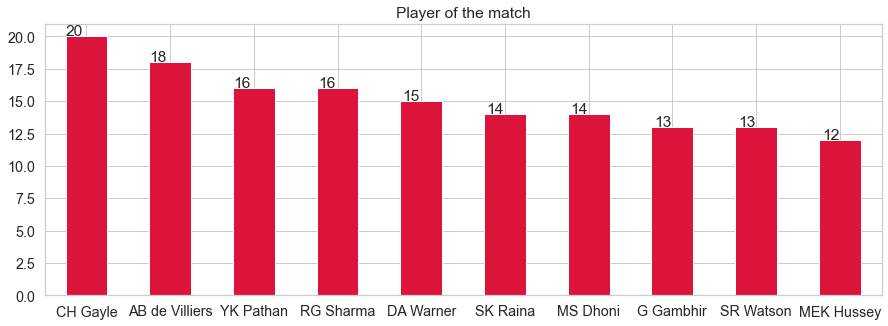

In [411]:
top_players = matches["player_of_match"].value_counts().head(10)
ax = top_players.plot(kind="bar", title="Player of the match", figsize=(15,5), rot=0, color="crimson")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

###### 7.4.2 Orange Cap Winner Per Season
The Orange Cap is presented to the leading run scorer in the season

In [419]:
orange_cap_players = deliveries_seasons.groupby(["season"]).apply(lambda x: (
                    x.groupby(["batsman"]).sum()
                    .sort_values('batsman_runs', ascending=False)).head(1))
orange_cap_players["batsman_runs"].to_frame().sort_values(by="season")

,,batsman_runs
season,batsman,
2008,SE Marsh,616
2009,ML Hayden,572
2010,SR Tendulkar,618
2011,CH Gayle,608
2012,CH Gayle,733
2013,MEK Hussey,733
2014,RV Uthappa,660
2015,DA Warner,562
2016,V Kohli,973


###### 7.4.3 Purple Cap
The Purple Cap is presented to the leading wicket-taker in the season

In [418]:
orange_cap_players = deliveries_seasons[deliveries_seasons["player_dismissed"].notnull()].groupby(["season"]).apply(lambda x: (
                    x.groupby(["bowler"]).count()
                    .sort_values("player_dismissed", ascending=False)).head(1))
orange_cap_players["player_dismissed"].to_frame().sort_values(by="season")

,,player_dismissed
season,bowler,
2008,Sohail Tanvir,24
2009,RP Singh,26
2010,PP Ojha,22
2011,SL Malinga,30
2012,M Morkel,30
2013,DJ Bravo,34
2014,MM Sharma,26
2015,DJ Bravo,28
2016,B Kumar,24


###### 7.4.4 Who is the most valuable player for MI (based on MOM)

In [307]:
mi_matches[mi_matches["winner"] == "MI"]["player_of_match"].value_counts().head(1)

RG Sharma    13
Name: player_of_match, dtype: int64

- **Rohit Sharma** is the most valuable player for **MI**

###### 7.4.5 Players with most 4s and 6s

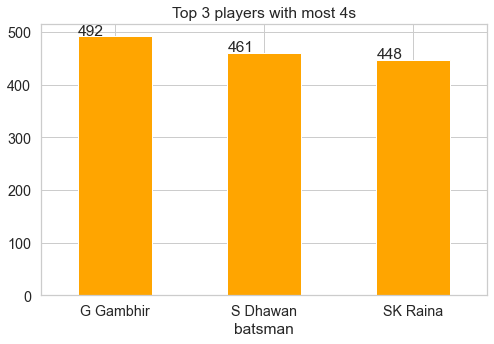

In [425]:
ax = deliveries[deliveries["batsman_runs"] == 4].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(3).plot(kind='bar', rot=0, title="Top 3 players with most 4s", figsize=(8,5), color='orange')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

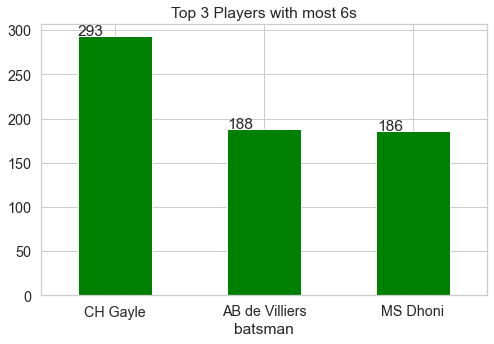

In [427]:
ax = deliveries[deliveries["batsman_runs"] == 6].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(3).plot(kind='bar', rot=0, title="Top 3 Players with most 6s", figsize=(8,5), color='green')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

---
<a name = Section8></a>                                                                      
# **8. Conclusion**                                                                                              
---

- We have got the dataset with data for 11 IPL seasons from 2008 to 2018
- Total matches played in these seasons is 696
- Most number of matches which is 76 were played in season 2013
- Most number of matches which is 73, were played in M Chinnaswamy Stadium
- Mumbai Indians played most matches which is 171 followed by RCB 166
- Mumbai Indians won most matches 98 followed by CSK 90
- Mumbai Indians and CSK have won 3 seasons each
	- Mumbai Indians in 2013, 2015 and 2017
	- CSK in 2010, 2011 and 2018
- CSK has the best winning percentage of 61.22% and Pune Warriors has worst winning percentage of 26.09%
- GL has has best winning percentage of 66.67	followed by CSK with 64.93% when they won the toss as well.
- Winning a team has actually helped the team to win the match as well by 51.3%
- Mumbai Indians won only 55.56% of the matches in which they won the toss
- Feroz Shah Kotla stadium is the best stadium for winning by runs
- Eden Gardens is the best stadium for winning by wickets
- Kolkata Knight Riders is good at defending the total
- 63.9% time a team has won the match if the team has won the toss as well and choose to field first
- Mumbai Indians won most matches in season 2013
- Wankhede Stadium is the best for MI to win the match when they also win the toss
- Mumbai Indians played most matches at Wankhede Stadium where batting first helped them winning the match by 35%
- CSK and DD defeated MI 11 times, where most of the times both CSK and DD opted to field first against MI
- For mumbai Indians "JDP Oram" gave the most runs in extra
- MI scored the highest number of runs (7690) throughtout the IPL season in power plays
- MI took the highest number of wickets (257) in powerplays
- CSK scored maximum runs in powerplay (1069) followed by KXIP (1013) in powerplay
- RCB took most MI wickets (37) followed by DD (33) in powerplay
- For Mumbai Indians, 'E Lewis' has the maximum strike rate of 166 during powerplay
- SM Pollock is the most economical baller with economy of 6.26 per over for MI during powerplay
- DJ Bravo has taken most wickets (29) against MI
- RG Sharma and KA Pollards patnership is the most successful (666 + 632 = 1298 Runs) for MI followed by RG Sharma and AT Rayudu (585 + 580 = 1165 Runs)
- Overall CH Gayle has scored most runs in a superover
- JP Faulkner has taken most wickets in superover
- CH Gayle has got most man of the match award i.e. 20 times
- Rohit Sharma is the most valuable player for MI
- G Gambhir has scored most 4s in IPL history
- CH Gayle has scored most 6s in IPL history